In [1]:
from src.visualization import visualise_model_performance
from src.visualization.plot_training import plot_training_curves, plot_combined_metrics, load_training_history
from src.models import build_dual_encoder_mobilenet_unet, build_unet_mobilenet
import torch

## RGB MobileNet U-Net

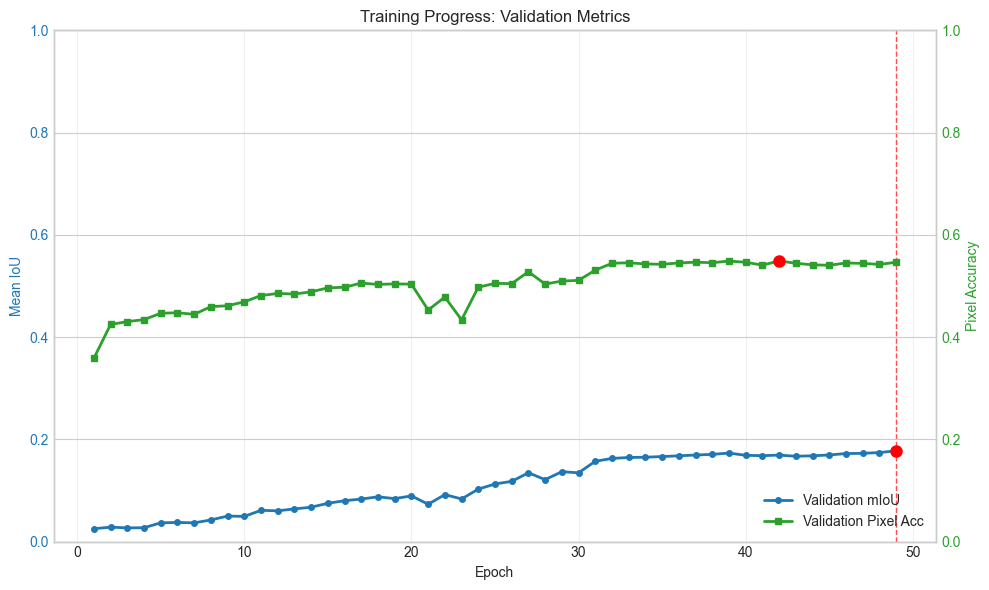

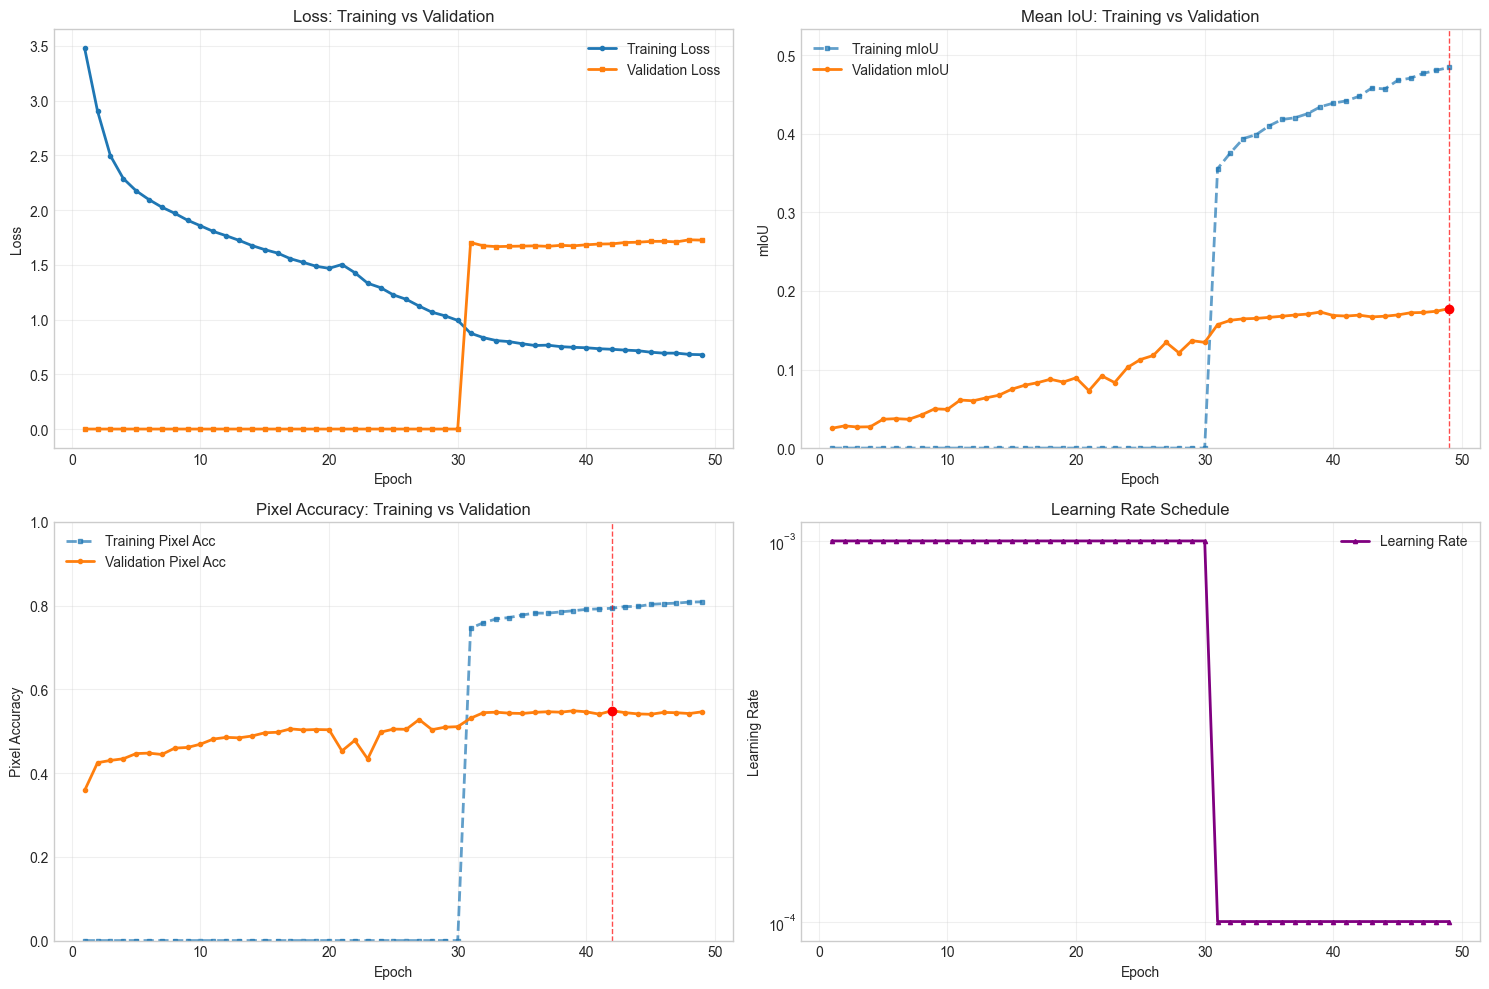

In [6]:
history = load_training_history("checkpoints/unet_mobilenet/best2.pth")
plot_combined_metrics(history);
plot_training_curves(history);

Loading ImageNet pretrained MobileNetV3-Small weights...
✓ Successfully loaded ImageNet pretrained MobileNetV3-Small weights
UNet-MobileNetV3-SMALL initialized:
  Total parameters: 2,361,960
  Trainable parameters: 2,361,960
  Encoder channels: [16, 16, 24, 48, 96]
Detected model input type: RGB


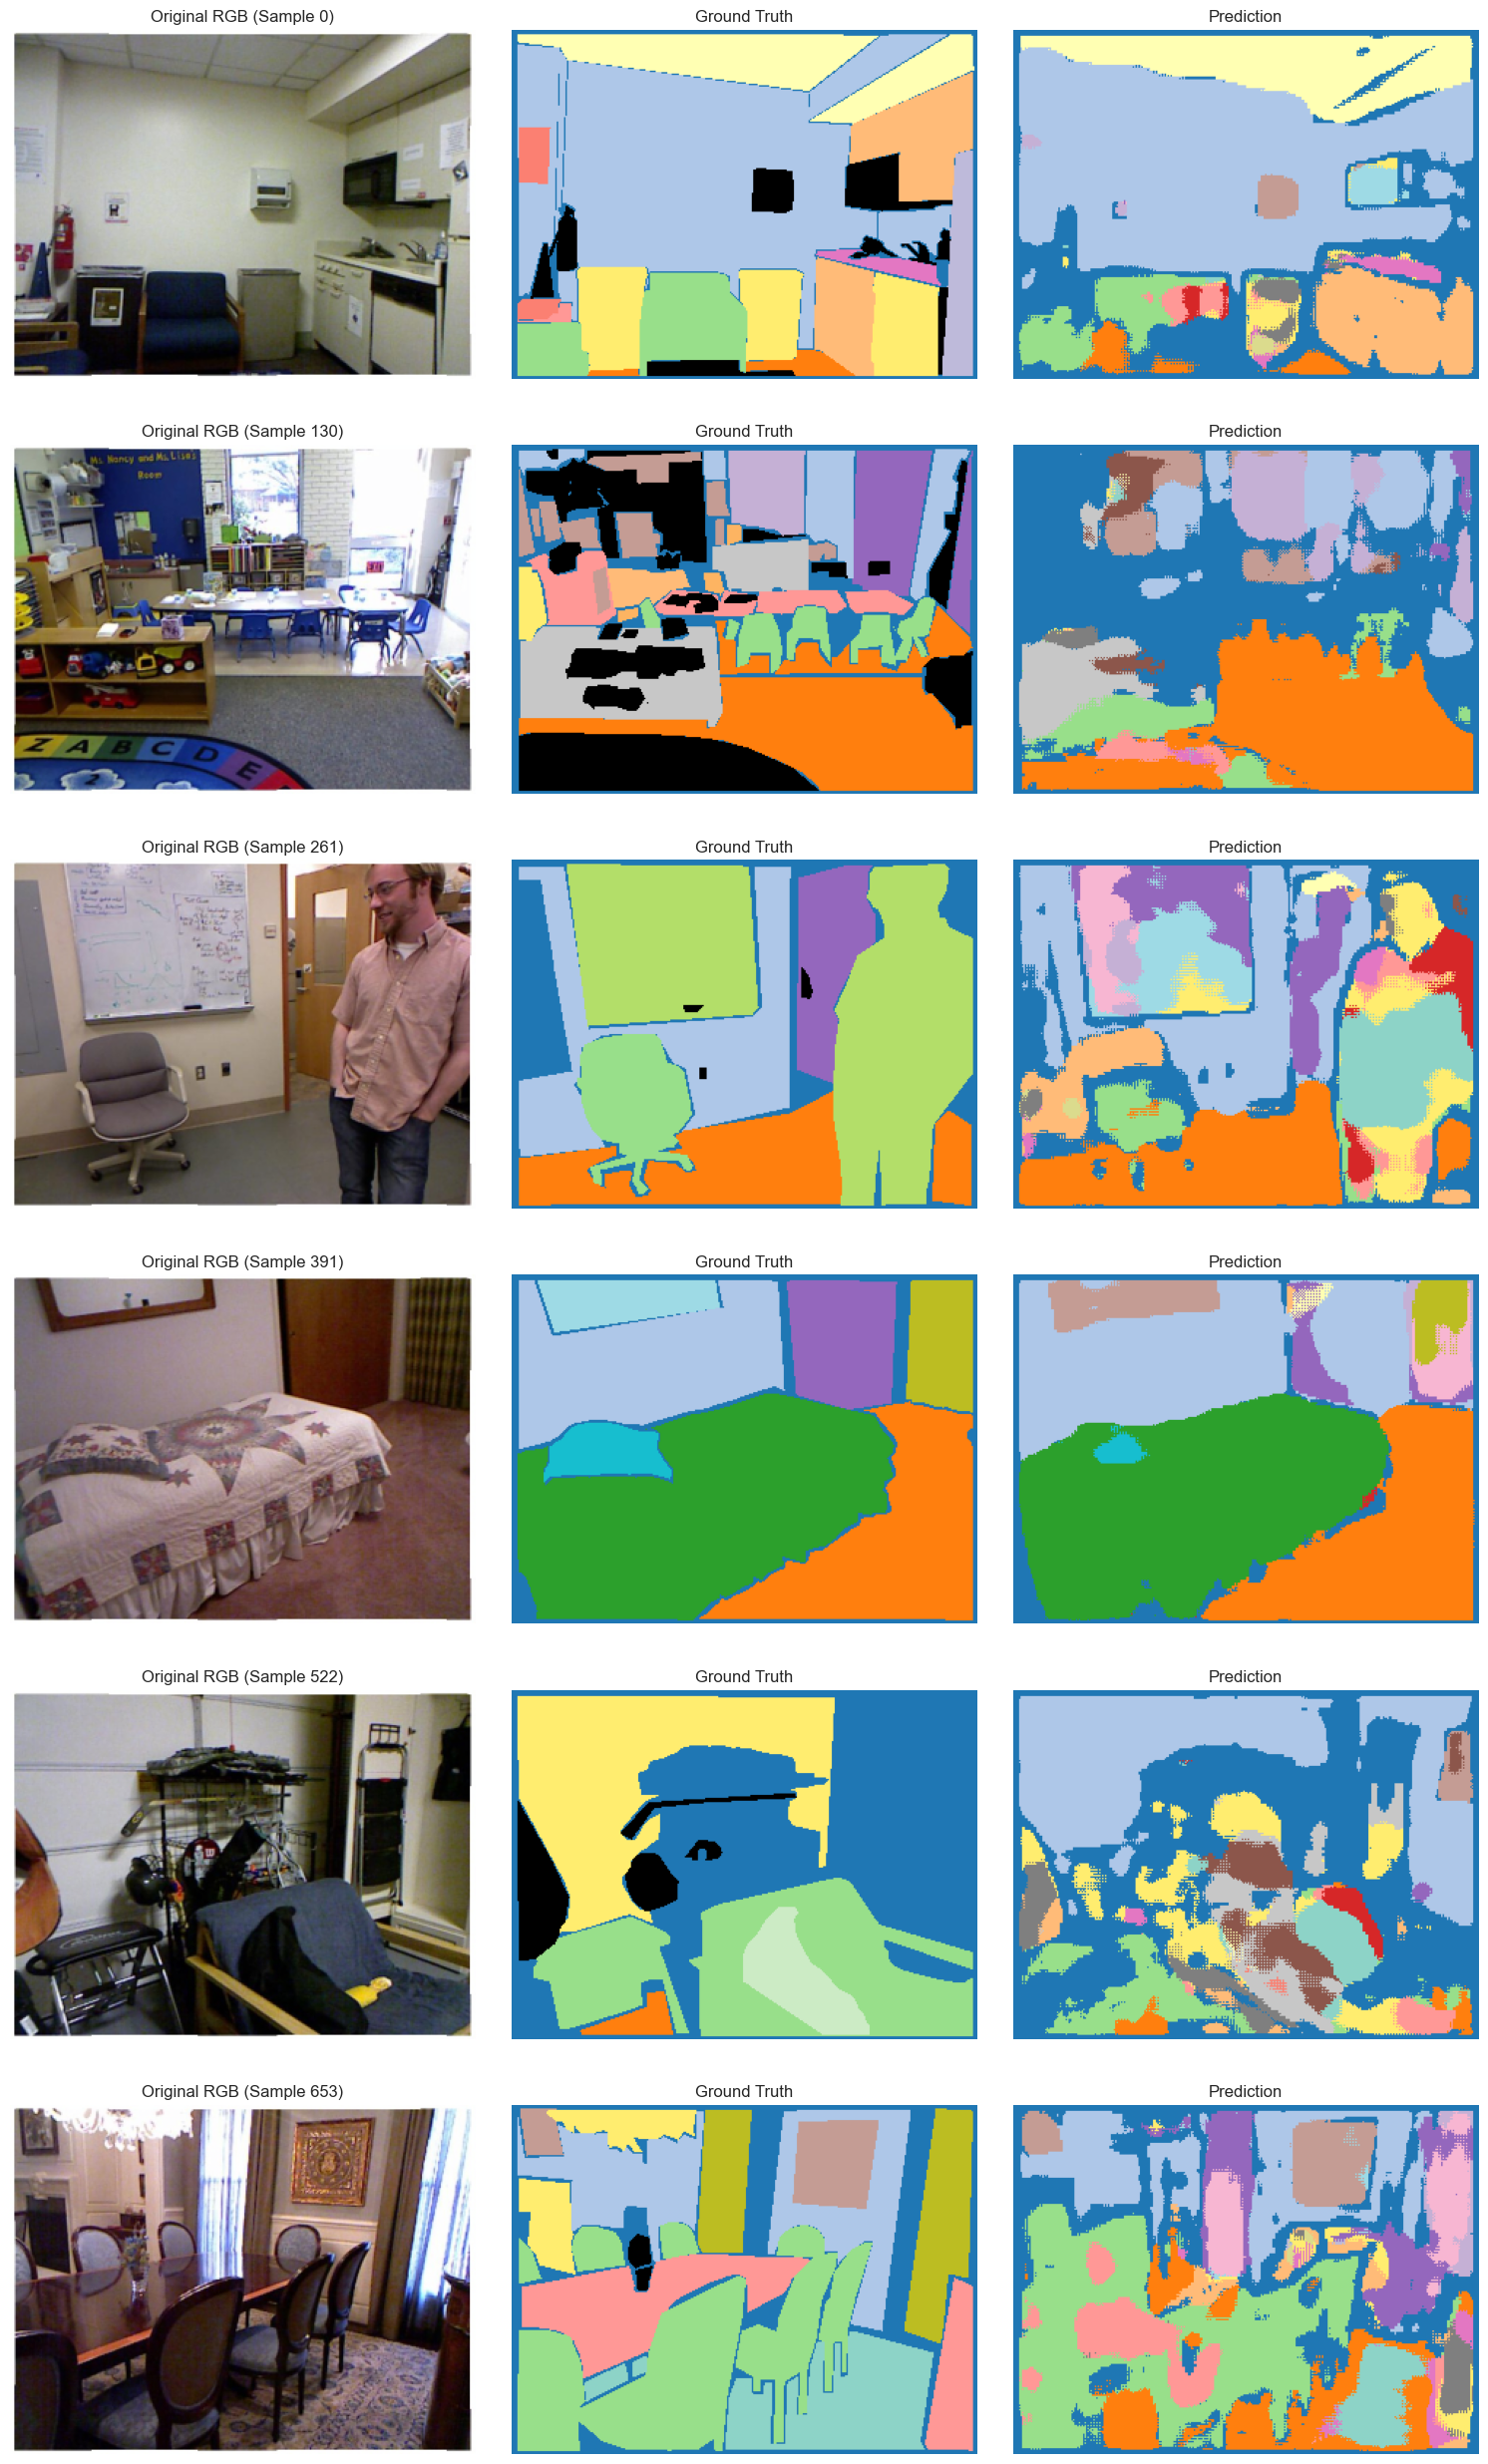


✓ Visualized 6 samples from test set
  Model input type: RGB
  Dataset: datasets/NYUDepthv2


In [ ]:
model = build_unet_mobilenet(num_classes=40)
model.load_state_dict(torch.load("checkpoints/unet_mobilenet/best2.pth", weights_only=False)['model_state'])
visualise_model_performance(model=model, 
                            split='test');

## RGB + Depth MobileNet U-Net

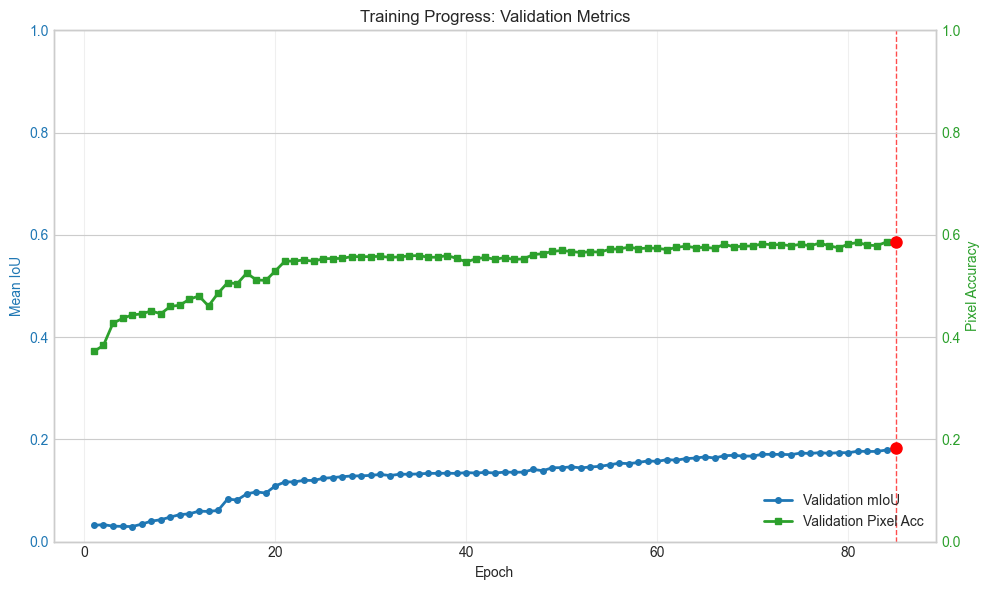

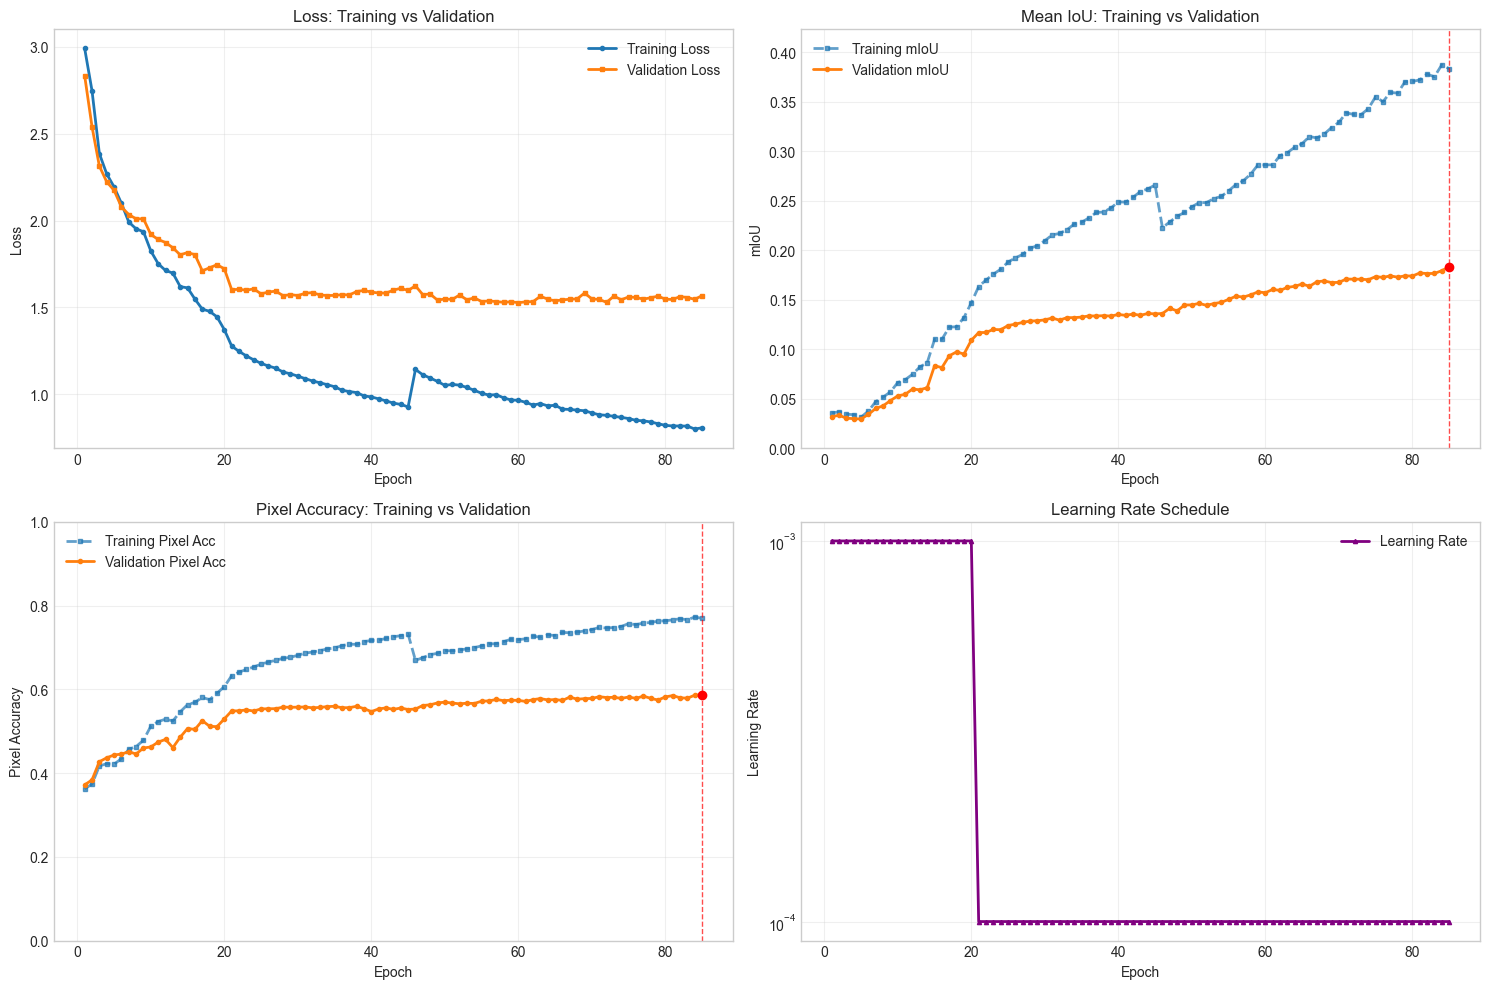

In [9]:
history = load_training_history("checkpoints/dual_encoder_unet_mobilenet/best.pth")
plot_combined_metrics(history);
plot_training_curves(history);

Loading ImageNet pretrained MobileNetV3-Small weights...
✓ Successfully loaded ImageNet pretrained MobileNetV3-Small weights
Loading ImageNet pretrained MobileNetV3-Small weights for depth encoder...
✓ Successfully loaded ImageNet pretrained MobileNetV3-Small weights
✓ Adapted first conv layer for depth input using weighted RGB initialization (green-favored)
Dual-Encoder UNet-MobileNetV3-SMALL initialized:
  Total parameters: 3,321,105
  Trainable parameters: 3,321,105
  RGB encoder channels: [16, 16, 24, 48, 96]
  Depth encoder channels: [16, 16, 24, 48, 96]
  Fused channels: [16, 16, 24, 48, 96]
Detected model input type: RGBD


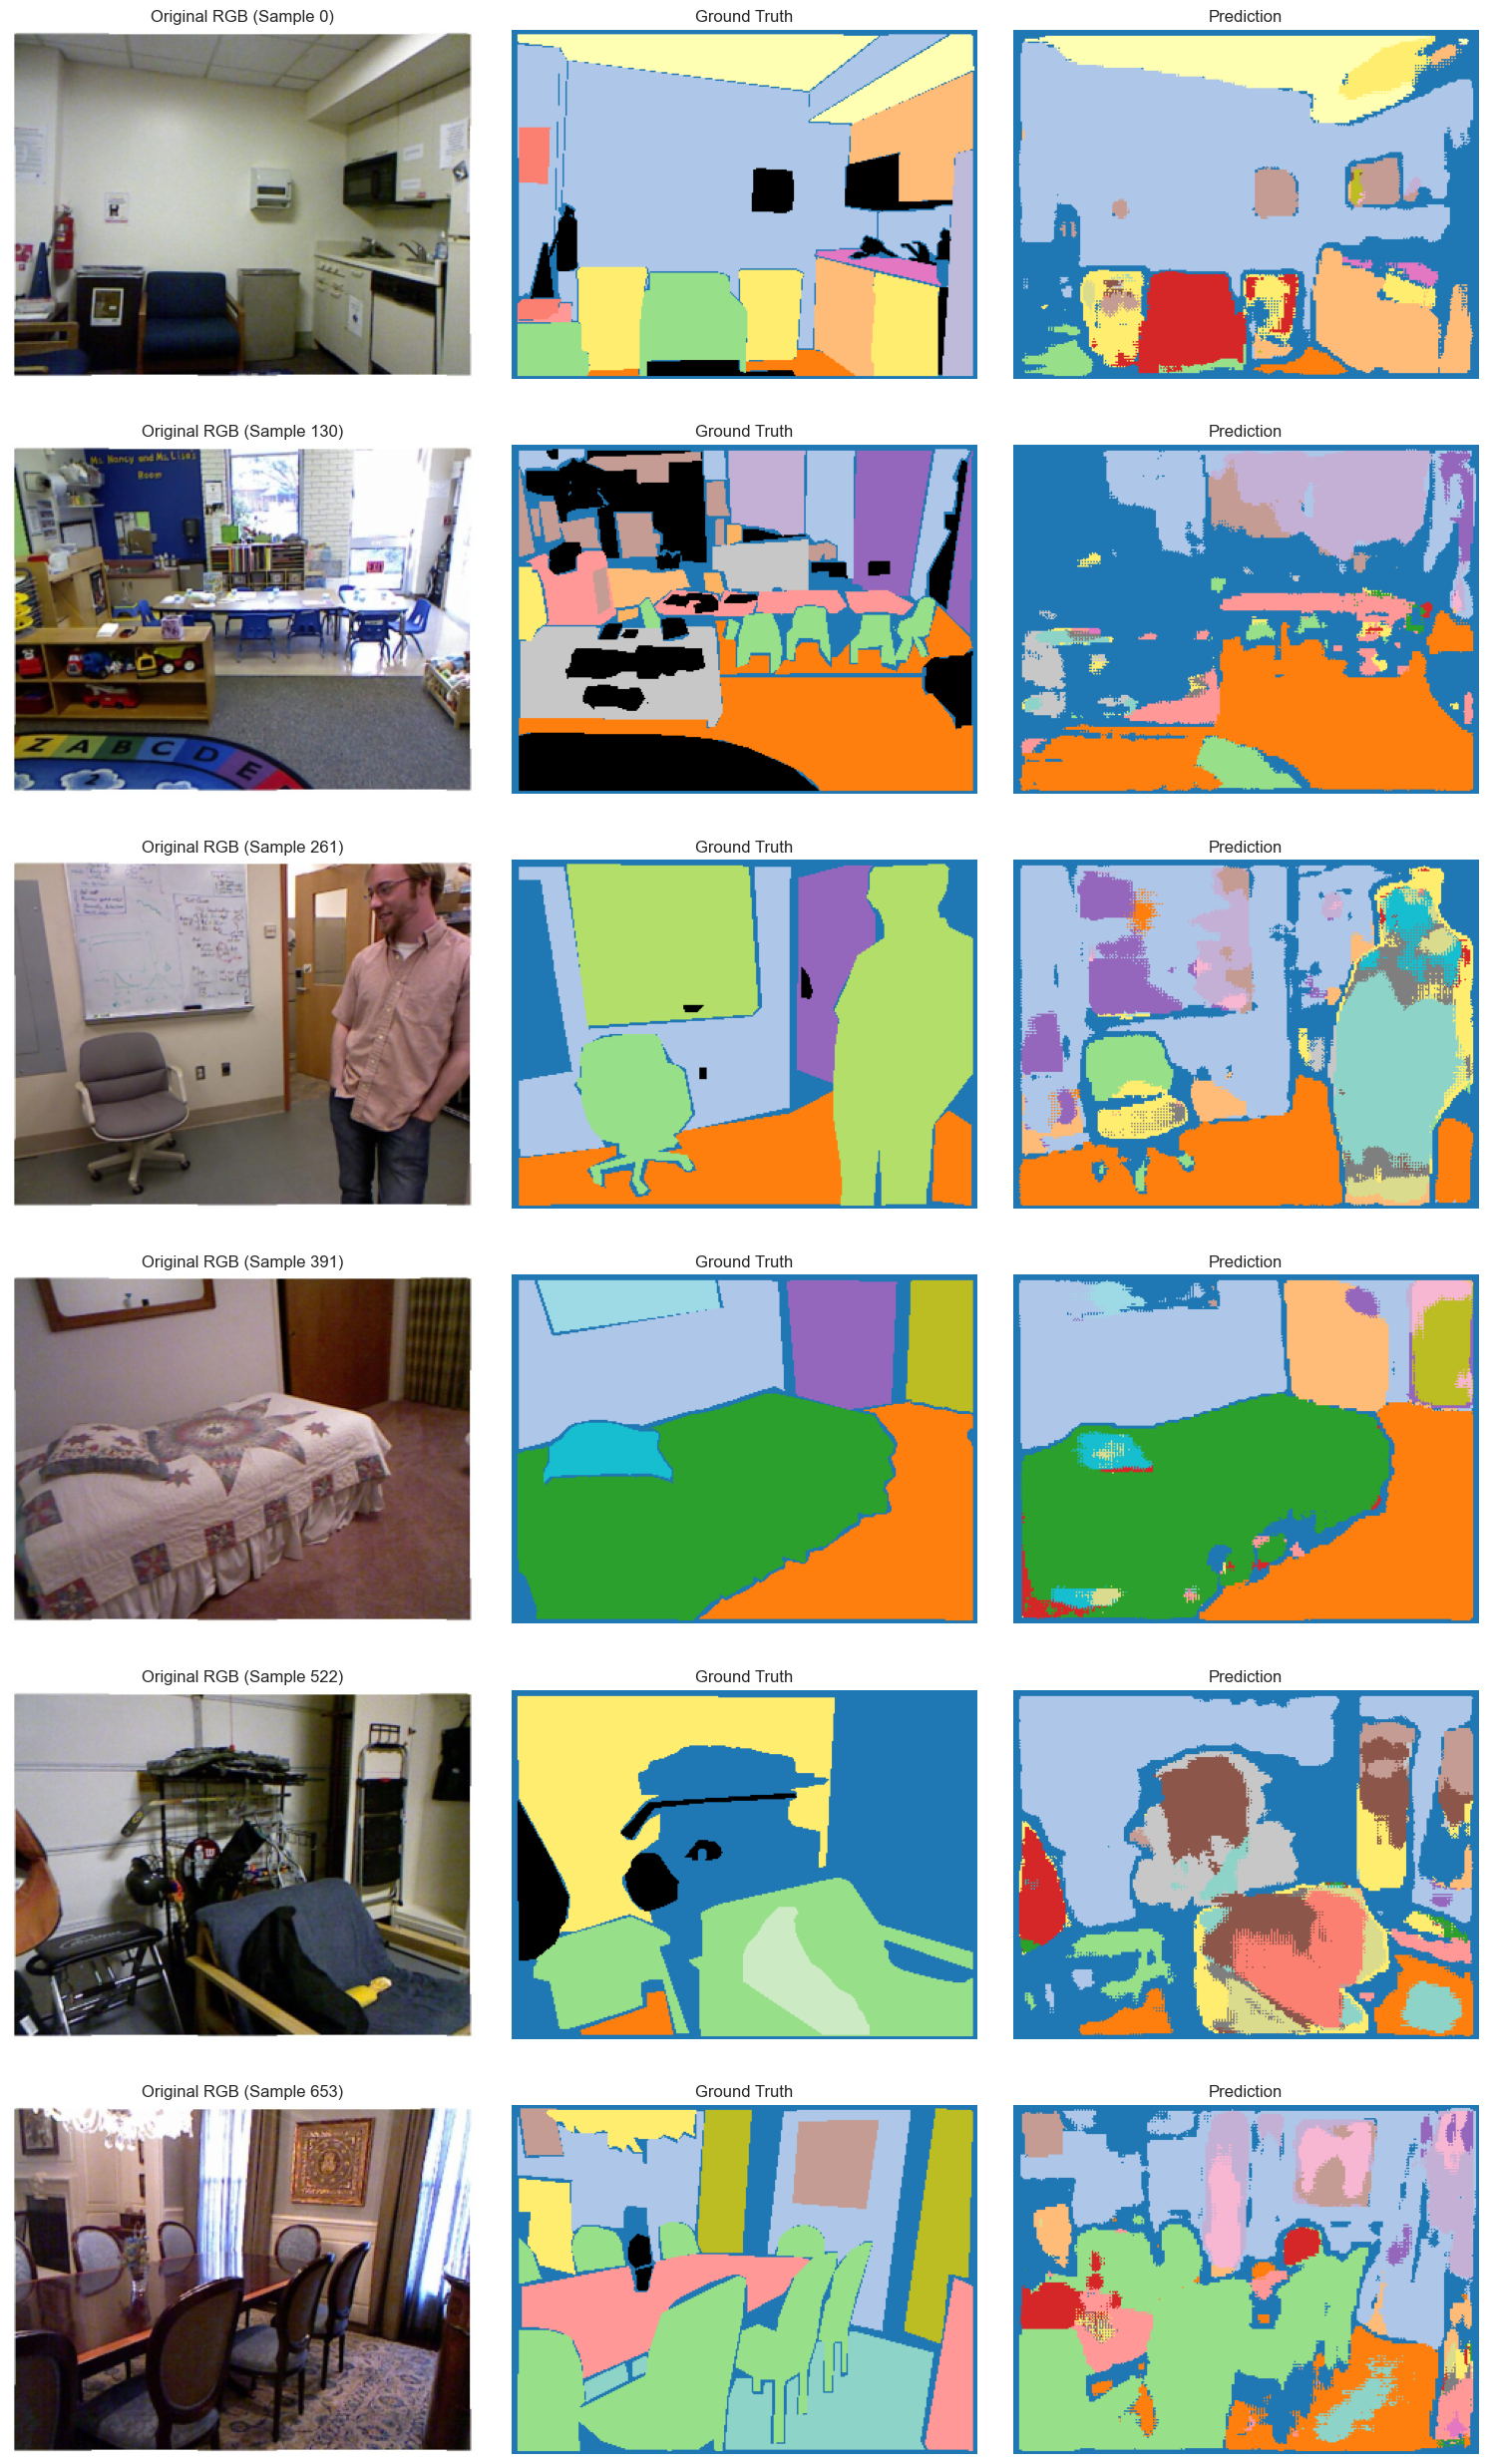


✓ Visualized 6 samples from test set
  Model input type: RGBD
  Dataset: datasets/NYUDepthv2


In [8]:
model = build_dual_encoder_mobilenet_unet(num_classes=40)
model.load_state_dict(torch.load("checkpoints/dual_encoder_unet_mobilenet/best.pth", weights_only=False)['model_state'])
visualise_model_performance(model=model, 
                            dataset_path="datasets/NYUDepthv2",
                            samples=6,
                            split='test',
                            figsize=(15, 25)
                            );